# Introduction aux calculs de régression

Nous présentons ici le problème de la programmation d'une régression linéaire, qui va nous permettre de présenter un algorithme élémentaire d'apprentissage automatique (*machine learning*).

Pour démarrer simple, nous n'aurons qu'un seul facteur, ici la surface d'un appartement à louer et la devinette que nous nous posons est de trouver le prix de son loyer.

Nous commencerons par la résolution statistique standard d'une construction de la droite de régression et nous construirons ensuite une solution introduisant un algorithme d'apprentissage automatique.

Nous avons collecté dans le fichier [loyers_montpellier_2015.csv](loyers_montpellier_2015.csv) une base de données de loyers en fonction de la surface.

In [1]:
import pandas as pd
df = pd.read_csv('loyers_montpellier_2015.csv')
df[:5]


,surface,loyer_mensuel
0,25,370
1,25,370
2,26,430
3,26,423
4,26,424


On afficher ces données sous formes d'un nuage de points (voir [ici](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) pour plus d'information). La commande `regplot` de l'extension [seaborn](https://www.geeksforgeeks.org/python-seaborn-regplot-method/) affiche directement le nuage de point et sa droite de régression.

<Axes: xlabel='surface', ylabel='loyer_mensuel'>

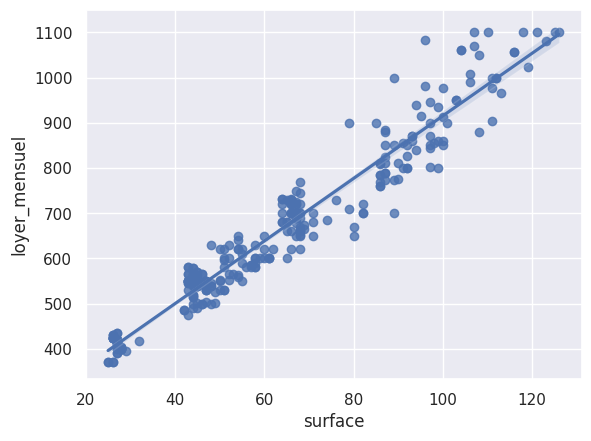

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# style seaborn
sns.set_theme(style="darkgrid")

# plt.plot(df['surface'], df['loyer_mensuel'], 'bo')
sns.regplot(x='surface',y='loyer_mensuel', data=df)

Mais nous allons recalculer les coefficients de cette droite de régression en utilisant plusieurs méthodes.

# Résolution en utilisant l'extension `statistics`

Les [calculs théoriques](https://fr.wikipedia.org/wiki/R%C3%A9gression_lin%C3%A9aire) donne l'équation de droite de régression linéaire.

$$ y = \beta_0 + \beta_1 \times x $$

et les coefficients sont donnés par les équations suivantes.

$$
\begin{array}{ll}
\beta_1 & = \text{cov}(X,Y) / \text{var}(X) \\
\beta_0 & = \bar{y} - \beta_1 \times \bar{x} \\
\end{array}
$$

avec la définition usuelle des moyennes ($\bar{y}$, $\bar{y}$), de la covariance et de la variance.

$$
\begin{array}{ll}
n \times \bar{x} &= \sum_{i=1}^n x_i \\
n \times \text{var}(X) &= \sum_{i=1}^n (x_i - \bar{x})^2 \\
n \times \text{cov}(X,Y) &= \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) \\ 
\end{array}
$$

Heureusement pour nous, l'extension [statistics](https://docs.python.org/3/library/statistics.html) calcule directement ces résultats à partir de listes, comme celles qu'on obtient à partir de la lecture du fichier [loyers_montpellier_2015.csv](loyers_montpellier_2015.csv).

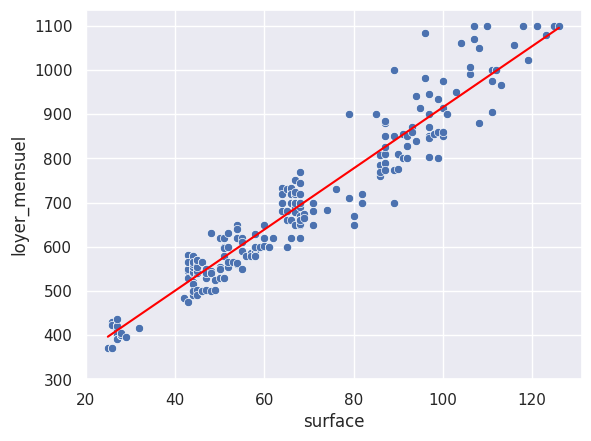

In [16]:
import statistics as stat
import seaborn as sns
import matplotlib.pyplot as plt

# on converti les séries d'entrées en listes pour cacluler 
# les coefficients de régression avec l'extension statistics
surfaces = df['surface'].tolist()
loyers = df['loyer_mensuel'].tolist()
slope, intercept = stat.linear_regression(surfaces, loyers)

# On construit les prédictions
predictions = []
for surf in surfaces:
    predictions.append(slope * surf + intercept)
# boucles obligatoires car surf est un float

# style seaborn
sns.set_theme(style="darkgrid")

# affichage du nuage de points
sns.scatterplot(x=df['surface'], y=df['loyer_mensuel'])

# affichage de la ligne de régression
sns.lineplot(x=df['surface'],y=predictions, color='red')

# les axes
plt.xlim(min(surfaces) // 10 *10)
plt.ylim(min(loyers) // 100 * 100)
plt.show()


# Créer son propre algorithme

Je vais présenter ici l'algorithme du gradient présenté (en javascprit) sur le blog de Thibault [Miximum](https://www.miximum.fr/blog/premiers-tests-avec-le-machine-learning/).

La droite rechechée est de la forme

$$y = \theta_0 + \theta_1 \times x $$

On se donne donc un vecteur $\theta = [\theta_0, \theta_1]$, qui contient les paramètres que nous cherchons à trouver.

Les $x = [x_i]_i$ sont les surfaces et les $y = [y_i]_i$ sont les loyers. Pour chaque valeur de $x_i$ existante dans le population, on calcule un erreur qui est égale à :

$$ \text{error} = \sum_i y_i - \left(\theta_0 + \theta_1 \times x_i \right) $$



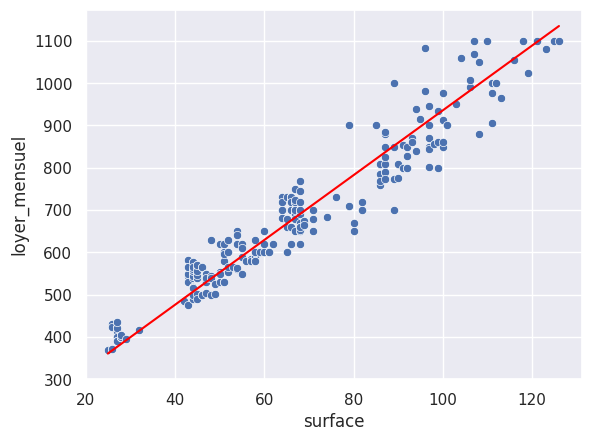

In [28]:
# theta est un tableau qui contient la liste des paramètres θ
def hypothesis(input, theta):
    return theta[0] + theta[1] * input    

def run_gradient_descent(x, y, theta):
    '''
      x est la liste de données d'entrée, les surfaces
      y est la liste des données de sorties, les loyers
      theta contient les paramètres du modèle en construction
    '''
    learning_rate = 0.0001
    m = len(y)
    new_theta = theta

    # Mise à jour des paramètres theta à chaque tour
    nb_of_theta = len(theta)
    for t in range(nb_of_theta):
        # calcul de la dérivée partielle de la fonction J en fonction
        # du paramètre theta
        errors = 0
        for i in range(m):
            if t == 0:
                errors += (hypothesis(x[i], theta) - y[i])
            else:
                errors += (hypothesis(x[i], theta) - y[i])*x[i]
        errors /= m

        # Mise à jour du paramètre theta en multipliant le taux
        # d'apprentissage (α) et la dérivée J'
        new_theta[t] = theta[t] - learning_rate * errors
    
    return new_theta

# ici on pourrait initialiser θ aléatoirement, mais je choisis de mettre 0 partout
theta = [0,0]
surfaces = df['surface'].tolist()
loyers = df['loyer_mensuel'].tolist()

NB_ITERATIONS = 100000

for i in range(NB_ITERATIONS):
    theta = run_gradient_descent(surfaces, loyers, theta)

intercept, slope = theta[0], theta[1]

# On construit les prédictions
predictions = []
for surf in surfaces:
    predictions.append(slope * surf + intercept)
# boucles obligatoires car surf est un float

# style seaborn
sns.set_theme(style="darkgrid")

# affichage du nuage de points
sns.scatterplot(x=df['surface'], y=df['loyer_mensuel'])

# affichage de la ligne de régression
sns.lineplot(x=df['surface'],y=predictions, color='red')

# les axes
plt.xlim(min(surfaces) // 10 *10)
plt.ylim(min(loyers) // 100 * 100)
plt.show()

Cet algorithme n'est pas optimisé et on peut tester plusieurs valeurs du nombre d'itérations à réaliser. On voit qu'il faut au moins 10000 itérations pour commencer à obtenir une droite de régression correcte.